In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) 

In [4]:
# read in the data
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Tut\Portfolio project\movies.csv")

In [5]:
#lets look at the data
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [15]:
# lets see if there is any missing data
for col in df.columns:
    data_missing = len(df[col][(df[col].isnull()==True)])
    print('{}-{}'.format(col,data_missing))

name-0
rating-77
genre-0
year-0
released-2
score-3
votes-3
director-0
writer-3
star-1
country-3
budget-2171
gross-189
company-17
runtime-4


In [19]:
# we are going to drop the missing values from gross and budget since we want o find out the correlation between those 2 
df.dropna(subset=['gross','budget'],inplace=True)

In [21]:
#change data type for columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [22]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5436 rows x 15 columns]

In [36]:
df['released'].str.replace('[a-zA-Z]','',regex=True).str[-9:-4]

0        1980
1        1980
2        1980
3        1980
4        1980
        ...  
7648     2020
7649     2020
7650     2020
7651     2020
7652     2020
Name: released, Length: 5436, dtype: object

In [37]:
#create correct year column
df['yearCorrect']= df['released'].str.replace('[a-zA-Z]','',regex=True).str[-9:-4]

In [38]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime yearCorrect  
0                            Warner Bros.    146.0        1980  
1                       Columbia Pictures    104.0        1980  
2                               Lucasfilm    124.0        1980  
3                      Paramount Pictures     88.0        1980  
4                          Orion Pictures     98.0        1980  
...                                   ...      ...         ...  
7648                    Columbia Pictures    124.0        2020  
7649                   Paramount Pictures     99.0        2020  
7650                   Universal Pictures    101.0        2020  
7651                 20th Century Studios    100.0        2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0        2020  

[5436 rows x 16 columns]

In [43]:
pd.set_option('display.max_rows',None)

In [68]:
df = df.sort_values(by='gross',ascending=False)

In [66]:
#look for any duplicates
len(df[df.duplicated(subset=['name','star','yearCorrect'])==True])

0

In [ ]:
# scatter plot with budget vs gross

<function matplotlib.pyplot.show(close=None, block=None)>

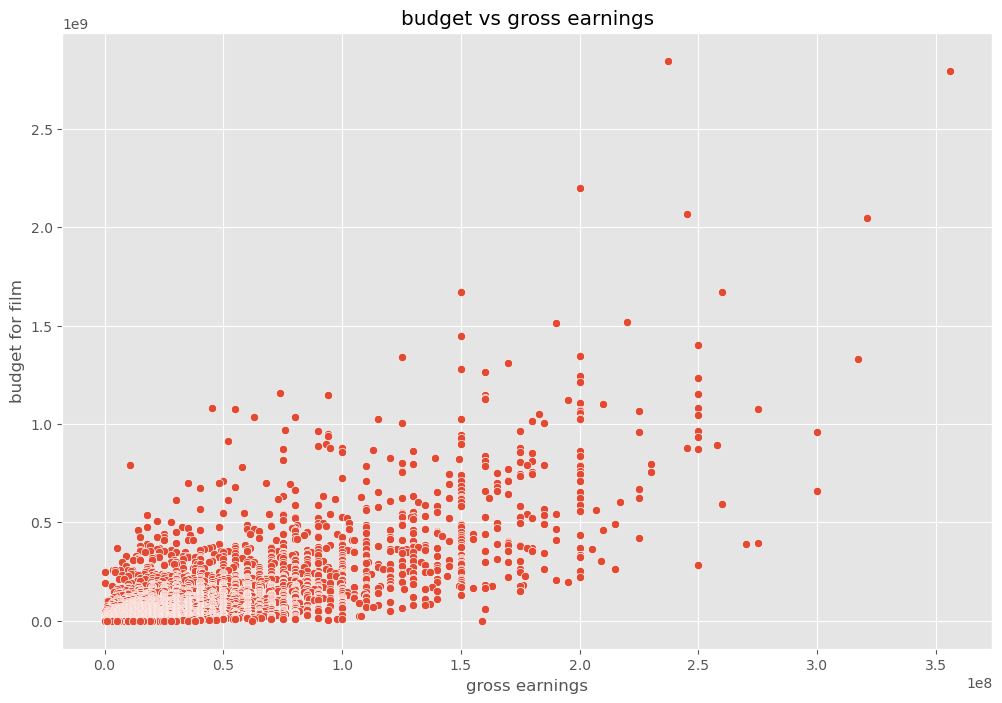

In [71]:
sns.scatterplot(data=df,x='budget',y='gross')
plt.title('budget vs gross earnings')
plt.xlabel('gross earnings')
plt.ylabel('budget for film')
plt.show

In [70]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearCorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

<Axes: xlabel='budget', ylabel='gross'>

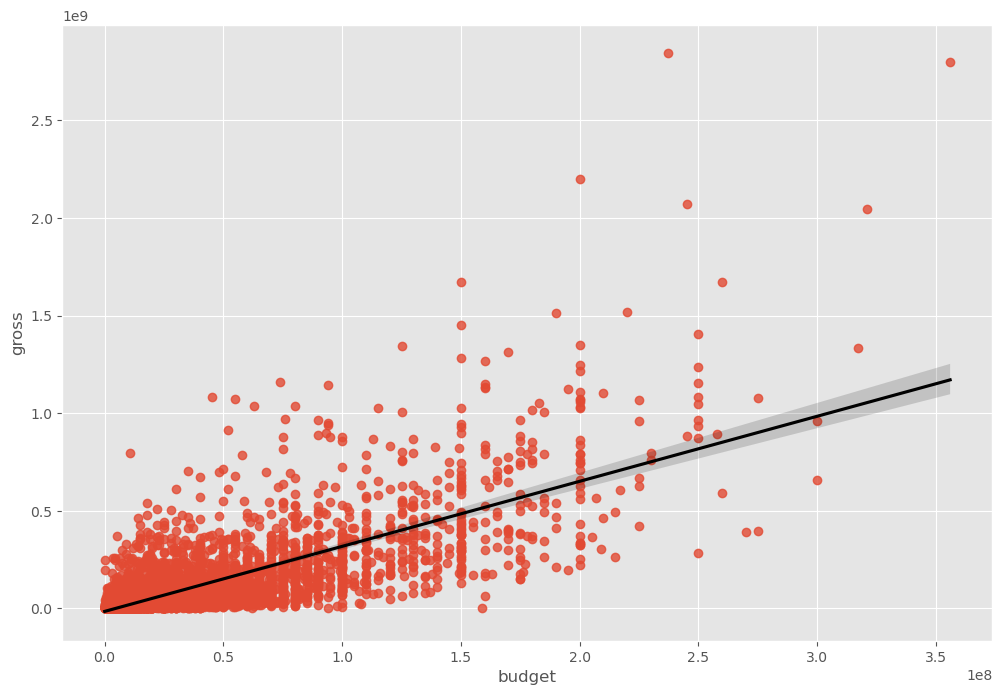

In [74]:
#plot budget vs gross in a regplot
sns.regplot(df,x='budget',y='gross',line_kws={'color':'black'})

In [76]:
df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

In [77]:
# high correlation betweeen budget and gross


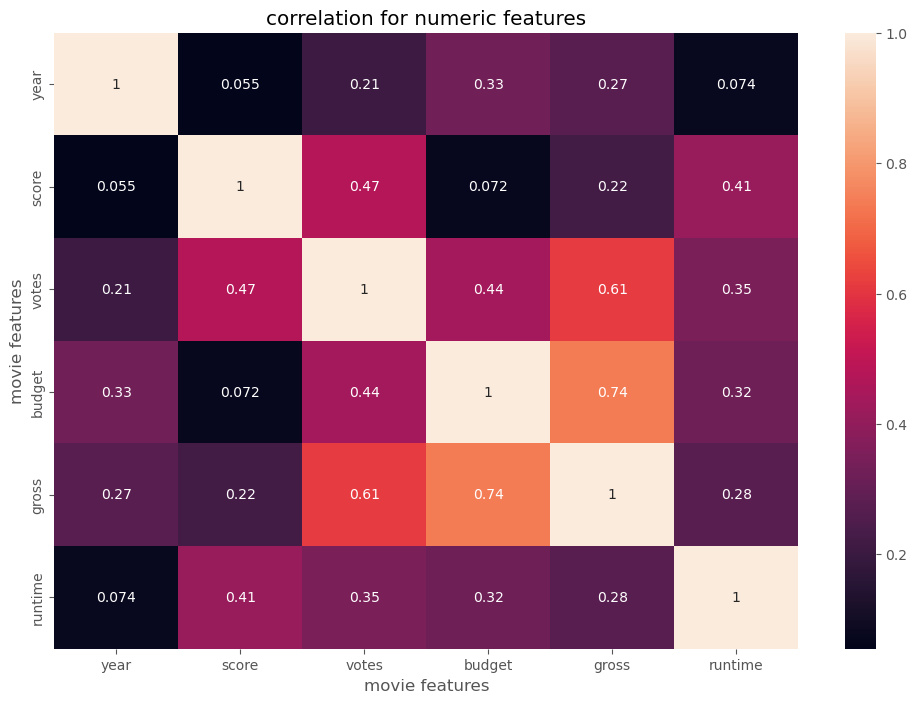

In [79]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [82]:
# converting string columns into category types to looke for any correlation
df_categorized = df
for col_name in df_categorized.columns:
    if(df_categorized[col_name].dtype=='object'):
        df_categorized[col_name] = df_categorized[col_name].astype('category')
        df_categorized[col_name] = df_categorized[col_name].cat.codes
df_categorized

name  rating  genre  year  released  score      votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000.0       787    1265   
7445   389       5      0  2019       138    8.4   903000.0       106     515   
3045  4923       5      6  1997       535    7.8  1100000.0       787    1265   
6663  3656       5      0  2015       530    7.8   876000.0       770    1810   
7244   390       5      0  2018       146    8.4   897000.0       106     515   
7480  4402       4      2  2019      1130    6.9   222000.0      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000.0       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000.0      1062    1650   
6646  1545       5      0  2015       166    7.1   370000.0       811     483   
7494  1534       4      2  2019      2059    6.8   148000.0       279    1386   
6644   388       5      0  2015      1717    7.3   777000.0      1062    1650   
7247   568       5      0  2018       725    7.3   661000.0      1721    2694   
5845  1736       5      1  2011      1096    8.1   790000.0       454    2871   
7075  3657       5      0  2017       501    7.0   581000.0      1592    2494   
7271  2126       5      0  2018      1388    6.2   277000.0       766     779   
6262  1533       4      2  2013      2088    7.4   585000.0       279    1386   
7072   478       4      7  2017      1566    7.1   283000.0       156    2831   
7281  1973       4      2  2018      1329    7.6   263000.0       194     328   
7055  4133       5      0  2017        45    6.6   214000.0       569    1015   
6244  2021       5      0  2013      1886    7.1   779000.0      1772     839   
6688  2554       4      2  2015      1054    6.4   218000.0      1146     363   
6846   752       5      0  2016      1916    7.8   694000.0       106     515   
7250   344       5      0  2018       566    6.9   404000.0       811     701   
4245  4421       5      0  2003       517    8.9  1700000.0      1523    1240   
7458  3608       5      0  2019      1140    7.5   359000.0      1021     481   
7456   757       5      0  2019      1702    6.8   478000.0        97     182   
5878  4964       5      0  2011      1446    6.2   390000.0      1305     888   
6059  3511       5      0  2012      2154    7.7   642000.0      1737    2227   
6494  4963       5      0  2014      1428    5.6   302000.0      1305     888   
2448  4402       1      2  1994      1398    8.5   970000.0      1690    1208   
6047  4062       5      0  2012      1148    8.4  1600000.0       319    1610   
7463  3653       5      0  2019       554    6.5   394000.0       770     491   
7450  2099       6      5  2019      2327    8.4  1000000.0      1943    3008   
7488  4950       1      2  2019      1376    7.7   217000.0      1054    1528   
5685  4949       1      2  2010      1349    8.2   776000.0      1164    1528   
4852  2997       5      0  2006      1259    7.3   668000.0       676    2937   
6869  3273       5      0  2016       510    7.8   572000.0       617     494   
7481   207       4      1  2019      1842    6.9   239000.0       707    1471   
5860  3000       5      0  2011      1808    6.6   492000.0      1640    2937   
7140  1105       4      2  2017      1468    6.3   119000.0      1146     526   
2245  2123       5      0  1993      1296    8.1   894000.0      1864    2075   
6908  1415       4      2  2016      1343    7.3   250000.0        82     153   
3451  3650       4      0  1999      1783    6.5   748000.0       655    1048   
5667   216       4      1  2010      1684    6.4   392000.0      1924    1853   
6863  5344       4      2  2016      1678    8.0   450000.0       241     391   
6045  4254       5      1  2012       493    7.8   773000.0      1523     969   
3843  1741       4      1  2001      1993    7.6   685000.0       282    1238   
5243  4061       5      0  2008      1120    9.0  2400000.0       319    1610   
6311  1104       4      2  2013      

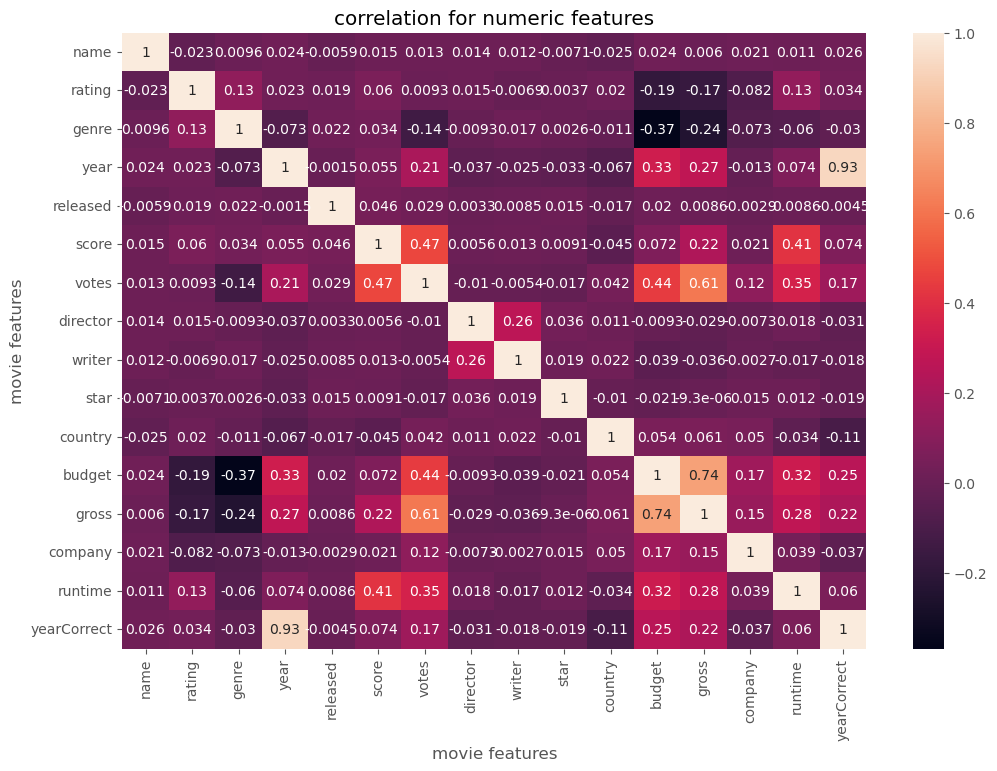

In [83]:
correlation_matrix = df_categorized.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [84]:
df_categorized.corr().unstack()

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.005966
             company        0.021209
             runtime        0.010800
             yearCorrect    0.026066
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [86]:
sorted_pairs = df_categorized.corr().unstack().sort_values()

In [87]:
sorted_pairs

genre        budget        -0.368900
budget       genre         -0.368900
genre        gross         -0.244380
gross        genre         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
genre        votes         -0.136457
votes        genre         -0.136457
yearCorrect  country       -0.106963
country      yearCorrect   -0.106963
rating       company       -0.082189
company      rating        -0.082189
genre        company       -0.073293
company      genre         -0.073293
genre        year          -0.073026
year         genre         -0.073026
             country       -0.066662
country      year          -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
score        country       -0.044690
country      score         -0.044690
writer       budget        -0.039420
budget       writer        -0.039420
yearCorrect  company       -0.036966
c

In [88]:
# list the features with highest correlations
high_corr = sorted_pairs[(sorted_pairs) > .5]

In [89]:
high_corr

votes        gross          0.614904
gross        votes          0.614904
             budget         0.740395
budget       gross          0.740395
year         yearCorrect    0.927093
yearCorrect  year           0.927093
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64

In [ ]:
 # votes and budget have high correlation to gross revenue